## Introduction to scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful scikit-learn library

What we're going to cover:
0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right algo for our problems
3. Fit the model/algo and use it to maek predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end scikit-learn workflow

In [1]:
# get the data ready
import pandas as pd
import numpy as np
heart_dis=pd.read_csv("data/heart-disease.csv")
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# create X (feature matrix)
x=heart_dis.drop("target",axis=1)
#create y (labels)
y= heart_dis["target"]

In [3]:
# choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Fit the model to training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)
clf.fit(x_train,y_train);

In [12]:
# make a predictio0n
y_preds=clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [13]:
y_test

122    1
95     1
271    0
15     1
152    1
      ..
92     1
184    0
155    1
138    1
233    0
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model
clf.score(x_train,y_train)

1.0

In [15]:
clf.score(x_test,y_test)

0.7704918032786885

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.81      0.81      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [17]:
confusion_matrix(y_test,y_preds)

array([[18,  7],
       [ 7, 29]], dtype=int64)

In [18]:
accuracy_score(y_test,y_preds)

0.7704918032786885

In [19]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f'Trying model with {i} estimators...')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 72.131148%

Trying model with 20 estimators...
Model accuracy on test set: 75.409836%

Trying model with 30 estimators...
Model accuracy on test set: 72.131148%

Trying model with 40 estimators...
Model accuracy on test set: 72.131148%

Trying model with 50 estimators...
Model accuracy on test set: 72.131148%

Trying model with 60 estimators...
Model accuracy on test set: 77.049180%

Trying model with 70 estimators...
Model accuracy on test set: 75.409836%

Trying model with 80 estimators...
Model accuracy on test set: 78.688525%

Trying model with 90 estimators...
Model accuracy on test set: 73.770492%



In [20]:
# 6. save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model.pkl","wb"))

In [23]:
loaded_model=pickle.load(open("random_forest_model.pkl","rb"))
loaded_model.score(x_test,y_test)

0.7377049180327869

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
  1. Split the data into feature and labels (usually 'x' & 'y')
  2. Filling (also called imputing) or disregarding missing values
  3. Converting non-numerical values to numerical values (also called feature encoding)

In [4]:
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
x=heart_dis.drop("target",axis=1)
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y=heart_dis["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [12]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4) #20 percent for test and remaning 80% for training. Here x is feature and y is label


In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((181, 13), (122, 13), (181,), (122,))

## 1.1 Make sure it's all numerical

In [14]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [2]:
#split into x/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


NameError: name 'car_sales' is not defined

In [1]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)


NameError: name 'x_train' is not defined

In [21]:
# convert string to number through sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_fea=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cat_fea)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [23]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
# let's refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
model.score(x_test,y_test)

0.3235867221569877

## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data alltogether.


In [39]:
# impport car sales missing data
car_sales_miss=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# create x and y
X=car_sales_miss.drop("Price",axis=1)
y=car_sales_miss["Price"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
# convert string to number through sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_fea=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cat_fea)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_miss)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 1: Fill missing data with Pandas

In [49]:
# fill the Make coloumn
car_sales_miss["Make"].fillna("missing",inplace=True)

#fill the 'colour' column
car_sales_miss["Colour"].fillna("missing",inplace=True)

# fill the "odometer" coloumn
car_sales_miss["Odometer (KM)"].fillna(car_sales_miss["Odometer (KM)"].mean(),inplace=True)

#fill the door coloumn
car_sales_miss["Doors"].fillna(4,inplace=True)

In [50]:
# check our dataframe again
car_sales_miss.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [51]:
#remove price with missing missing price value
car_sales_miss.dropna(inplace=True)
car_sales_miss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
len(car_sales_miss)

950

### Option 2 : Fill missing value with scikit learn

In [1]:
import pandas as pd
car_miss=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_miss.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [2]:
car_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [3]:
car_miss.dropna(subset=["Price"],inplace=True)
car_miss.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [4]:
# split into x & y
x=car_miss.drop("Price",axis=1)
y=car_miss["Price"]

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with "missing" & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#define coloumns 
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#Create an imputer (something that fill missing data)
imputer =ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

#transform the data
filled_X=imputer.fit_transform(x)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [6]:
car_filled=pd.DataFrame(filled_X,columns=['Make',"Colour","Doors","Odometer (Km)"])
car_filled

,Make,Colour,Doors,Odometer (Km)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [7]:
car_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (Km)    0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_fea=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cat_fea)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [12]:
# now we've got our data as numbers and filled 
import numpy as np
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model= RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2.Choosing right model

somethings to note:
 *Sklearn refers to machine learning models, algorithms as estimators.
 * Classification problem - predecting a category (heart disease or not)
 * sometimes you'll see clf used as a classification estimator
 *regression problem - predicting a number (selling price of a car)
If you're working on a machine learning problem and looking to use sklearn and not sure what model you should use, refer to the sklearn machine learning map

## 2.1 Picking a machine learning model for a regression problem

In [2]:
# get california Housing dataset
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [22]:
# import algorithm
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import train_test_split
#setup random seed
np.random.seed(42)
#create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
#Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instatiate and fit the model
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.5758549611440125

what if ridge didn't work or the score didn't fit our needs?
Well, we could always try a different model...
How about we try ensemble (esenmble is a collection of small model for better prediction)


In [25]:
# import randomForestregressor model class from the esenble module
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
#split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instatiate and fit model
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.806652667101436

## 2.2 Picking a machine learning model for Classification problem


In [22]:
import pandas as pd
heart_dis=pd.read_csv("data/heart-disease.csv")
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
len(heart_dis
   )

303

Consulting the map and it says to try LinearSVC

In [7]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.model_selection import train_test_split
#setup random seed
np.random.seed(42)
#make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# inatiate the model
clf=LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


C:\Users\Aryan Singh\desktop\python\sampleProject\env\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [5]:
heart_dis["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
# import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
#make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# inatiate the model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [18]:
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algo on our data and use it to make prediction

In [14]:
#import the model
from sklearn.ensemble import RandomForestClassifier
#setup the seed
np.random.seed(42)
#Make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# initiate the model 
clf=RandomForestClassifier()
#fit the model to the data (trainning the machine learning model)
clf.fit(x_train,y_train)
#Evaluate the random forest classifier (use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

## 3.2 Make prediction using a machine learning model

Two ways to predict 
  1. Predict()
  2. predict_proba()

In [16]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [18]:
clf.score(x_test,y_test)

0.8524590163934426

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make prediction using predict_proba()

In [23]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [24]:
# let's predict() on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [9]:
import numpy as np
import pandas as pd
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split the data into trainign sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#create model instance
model=RandomForestRegressor()
model.fit(x_train,y_train)

#evaluating the model
y_pred=model.predict(x_test)

In [18]:
y_pred[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

## 4. Evaluating a machine learning model

Three ways to evaluate scikit-learn models/esitmators:
 1. Estimator's built-in score() method
 2. The scoring parameter
 3. Problem specific metric function

## 4.1 Evaluating a model with the score method

In [4]:
# import the model
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(42)
#make the data
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# inatiate the model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)



NameError: name 'np' is not defined

In [24]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(1.0, 0.8524590163934426)

## 4.2 Evaluating a model using the scoring parameter

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

#make data
x=heart_dis.drop("target",axis=1)
y=heart_dis['target']
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#initiate data
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [7]:
cross_val_score(clf,x,y,cv=10)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.83333333])

In [3]:
np.random.seed(42)
#single training and test split score
single_score=clf.score(x_test,y_test)

#cross-validation score
crossValidScore=np.mean(cross_val_score(clf,x,y,cv=5))
# comparing the two
single_score,crossValidScore



(0.8524590163934426, 0.8248087431693989)

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_dis.drop("target",axis=1)
y=heart_dis['target']

clf=RandomForestClassifier()
crossValScore=np.mean(cross_val_score(clf,x,y))

In [8]:
print(f'heart disease classifier Accuracy: {np.mean(crossValScore)*100:.2f}%')

heart disease classifier Accuracy: 82.48%


**Area under the reciever operating characteristic**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).
* True positive =model predicts 1 when truth is 1
* False positive = model preddicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative =model predicts 0 when truth is 1

In [5]:
# create x_test...etc
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.metrics import roc_curve
#fit the classifier
clf.fit(x_train,y_train)

#make prediction with probabilities
y_probs=clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [7]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [8]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds= roc_curve(y_test,y_probs_positive)

#check the false postive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

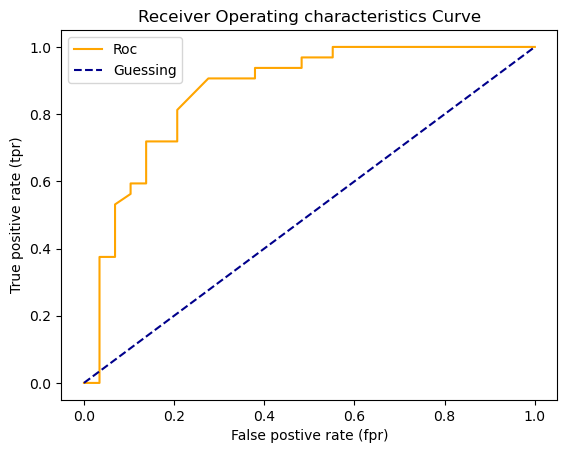

In [9]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="Roc")
    # plot line
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    # customize the plot
    plt.xlabel("False postive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating characteristics Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)


0.9172113289760349

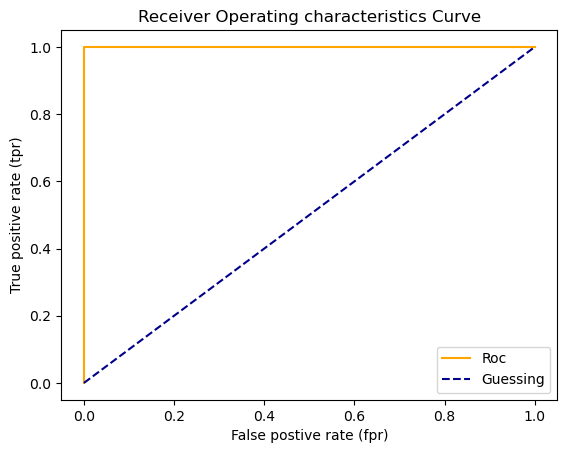

In [10]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds =roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

**Confusion Matrix**
A confusion matrix is a quick way to compare the label a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [15]:
from sklearn.metrics import confusion_matrix
np.random.seed(42)

y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [16]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


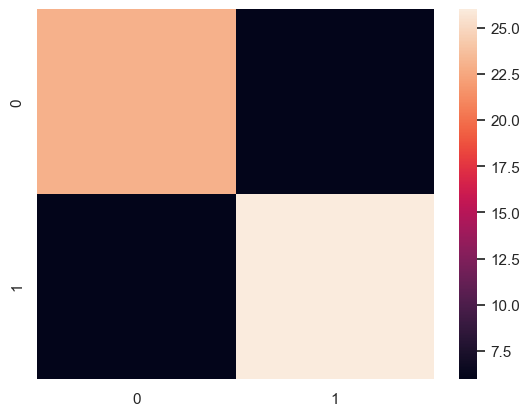

In [20]:
# MAke our confusion matrix more visual with seaborn heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1)

#create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)
#Plot it using seaborn
sns.heatmap(conf_mat);

### creating a confusion matrix using scikit learn

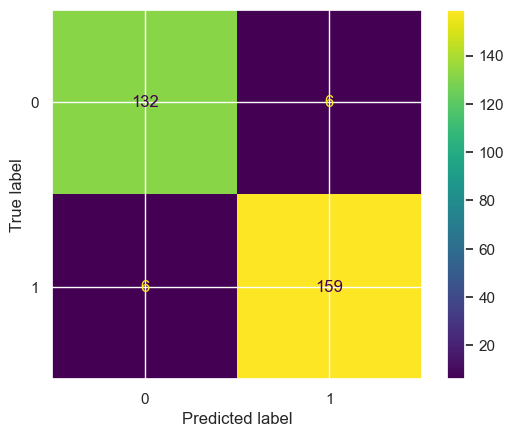

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

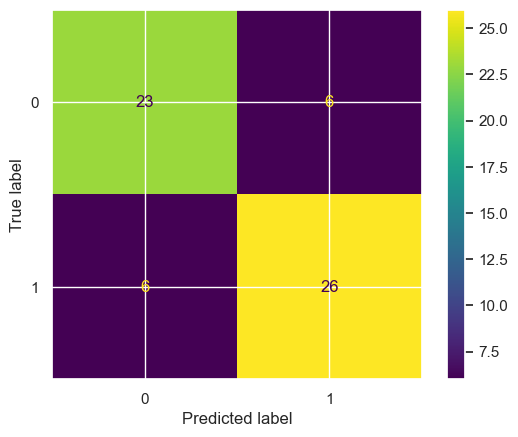

In [23]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

### Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [27]:
# Where precision and recall become valuable

dis_true=np.zeros(10000)
dis_true[0]=1 #only one positive case
dis_preds=np.zeros(10000)
pd.DataFrame(classification_report(dis_true,dis_preds,output_dict=True))

C:\Users\Aryan Singh\desktop\python\sampleProject\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aryan Singh\desktop\python\sampleProject\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aryan Singh\desktop\python\sampleProject\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

The one's we are going to cover
 1. r^2 (pronounced r-squared or coefficient of determination)
 2. Mean absolute error
 3. MEan squared error
 

In [6]:
# calculating r-squared
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.806652667101436

In [8]:
y_test.mean()

2.0550030959302275

In [7]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [8]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [9]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

** Mean absolute error (MAE)**
MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are.

In [10]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.32656738464147306

In [11]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values": y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [12]:
# mean absolute error using formulas and differences

np.abs(df["differences"]).mean()

0.326567384641474

### Mean squared differences

MSE is the mean of the square of the errors between actual and predicts values.

In [13]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.25336408094921037

In [14]:
df["squared_differences"]=np.square(df["differences"].mean())

In [15]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared_differences"]=16

In [16]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,0.45800,0.754940,0.296940,0.000146
15663,5.00001,4.928596,-0.071414,0.000146
20484,2.18600,2.540240,0.354240,0.000146
9814,2.78000,2.331760,-0.448240,0.000146


### 4.2.3 Finally using the scoring parameter...

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

clf=RandomForestClassifier()


In [20]:
np.random.seed(42)

#cross-validation accuracy

cv_acc=cross_val_score(clf,x,y,cv=5, scoring=None) 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [21]:
print(f"The cross-validated accurace is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accurace is: 82.48%


In [22]:
# Precision
np.random.seed(42)
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [26]:
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [25]:
# Recall
np.random.seed(42)
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [27]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see Scoring parameter being using for a regression problem

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor()
cv_r2=cross_val_score(model,x,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545660727379677

In [15]:
cv_r2

array([0.62156808, 0.72076221, 0.62136792])

In [16]:
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43025886210571906

In [37]:
cv_mse

array([-0.50635306, -0.33007243, -0.53676267])

In [19]:
# Mean sqaured error
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46751646577034894

In [36]:
cv_mae

array([-0.51737186, -0.42191774, -0.50676033])

### 4.3 Using different evaluation metrics as scikit learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

#create x and y
x=heart_dis.drop('target',axis=1)
y=heart_dis["target"]
#train, test and split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
#initiate the model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
# make prediction
y_preds=clf.predict(x_test)
#evaluate the model
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

#create x and y 
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
#train, test and split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#initiate the model
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
#evaluate the model
print(f"r2: {r2_score(y_test,y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_preds)}")



r2: 0.806652667101436
Mean Absolute Error: 0.32656738464147306
Mean Squared Error: 0.25336408094921037


### 5. Improving a model

First prediction = baseline prediction.
First model= baseline model.

From a data prerspective:
* could we collect more data? (generally, the more data, the better)
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters = model find these pattern in data
Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find positions

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparameters:
 1. By hand
 2. Randomly with RandomSearchCV
 3. Exhaustively with GridSearchCV
 

In [8]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation compariosn on y_true labels vs y_pred labels on a classification.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision= precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metrics_dict={"accuracy":round(accuracy,2),"precision":round(precision,2),"recall":round(recall,2),"f1":round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Prec: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")
    return metrics_dict

In [11]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# shuffle the data
heart_dis_shuff=heart_dis.sample(frac=1)
#split into x and y
x=heart_dis_shuff.drop('target',axis=1)
y=heart_dis_shuff["target"]
#split the data into train, validation & test sets
train_split =round(0.7*len(heart_dis_shuff))
valid_split=round(train_split+0.15*len(heart_dis_shuff))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

#initiate the model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#make baseline predictions
y_preds=clf.predict(x_valid)

#evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
Prec: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [12]:
np.random.seed(42)
#initiate the model
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)

#make baseline predictions
y_preds2=clf.predict(x_valid)

#evaluate the classifier on validation set
clf_metrics=evaluate_preds(y_valid,y_preds2)
clf_metrics

Acc: 82.22%
Prec: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[10,100,200,500,1000,1200],'max_depth':[None,5,10,20,30],'max_features':["auto","sqrt"],'min_samples_split':[2,4,6],'min_samples_leaf':[1,2,4]}
np.random.seed(42)

#split into x and Y
x=heart_dis_shuff.drop("target",axis=1)
y=heart_dis_shuff["target"]

#split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=1)
#setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2) #n_iter is number of model to try
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [29]:
rs_clf.best_params_


{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [22]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)
# Evaluate the predictions
rs_metrics= evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Prec: 0.77
recall: 0.86
f1: 0.81


### 5.3 Hyperparamter tuning with gridSearchCV

In [14]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [15]:
grid_2={'n_estimators': [ 100,200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)
x=heart_dis_shuff.drop("target",axis=1)
y=heart_dis_shuff["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#clf=RandomForestClassifier(n_jobs=1)
#gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)
#gs_clf.fit(x_train,y_train);

In [19]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [18]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc: 78.69%
Prec: 0.74
recall: 0.82
f1: 0.78


let's compare our different models metrics.

In [23]:
compare_metrics=pd.DataFrame({'baseline':baseline_metrics,'clf_2':clf_metrics,'random metrics':rs_metrics,'grid search':gs_metrics})
compare_metrics

,baseline,clf_2,random metrics,grid search
accuracy,0.82,0.82,0.82,0.79
precision,0.81,0.81,0.77,0.74
recall,0.88,0.88,0.86,0.82
f1,0.85,0.85,0.81,0.78


<AxesSubplot:>

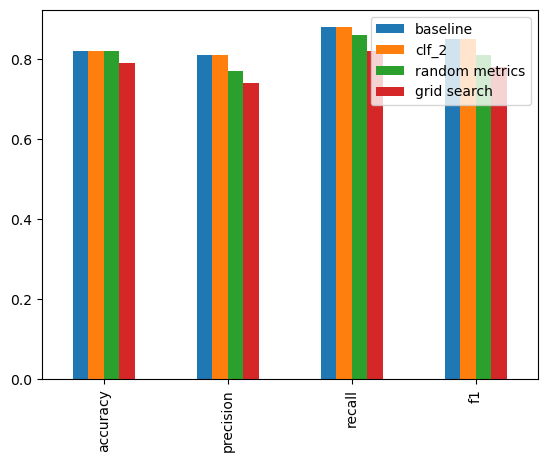

In [28]:
compare_metrics.plot.bar()

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's pickle module
2. With the joblib module

### Pickle

In [30]:
import pickle
# save an exisiting model to file
pickle.dump(gs_clf,open("gs_randomForest.pkl","wb"))

In [31]:
# load a saved model
loaded_pickle_model=pickle.load(open("gs_randomForest.pkl","rb"))

In [34]:
pickle_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_preds)

Acc: 78.69%
Prec: 0.74
recall: 0.82
f1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## Joblib

In [36]:
from joblib import dump,load

#save model file
dump(gs_clf,filename="gsRandomForest1.joblib");


In [37]:
# Import a saved joblib model
loaded_job_model=load(filename="gsRandomForest1.joblib")

In [39]:
# Make and evaluate joblib predictions
joblib_y_preds=loaded_job_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 78.69%
Prec: 0.74
recall: 0.82
f1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### 7. Putting it all together

In [44]:
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [46]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill  missing data
2. Convert data to numbers
3. Build a model on the data

In [62]:
#Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setting random seed
np.random.seed(42)

#Import data and drop rows with missing labels
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Define different features and transformer pipeline
cat_fea=["Make","Colour"]
cat_fea_trans=Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]
door_trans=Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value=4))])
numeric_features=["Odometer (KM)"]
numeric_trans=Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor= ColumnTransformer(transformers=[
    ("cat",cat_fea_trans,cat_fea),
    ("door",door_trans,door_feature),
    ("numeric",numeric_trans,numeric_features)
])

# creating a preprocessing and modeling a pipeline
model=Pipeline(steps=[("Preprocessor",preprocessor),("Model",RandomForestRegressor())])

#Split data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fit and score the model
model.fit(x_train,y_train)


Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                              

It's also possible to use 'GridSearchCV' or 'RandomSearchCV' with our Pipeline

In [68]:
# Use GridSearchCV with our regression pipleline

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}
gs_model= GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)
gs_model.score(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter model for estimator Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('Model', RandomForestRegressor())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [69]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
